<a href="https://colab.research.google.com/github/macapagithub/exaple-unsupervised-learning/blob/master/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Models

In [1]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
url_train_labels = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/training_set_labels.csv'
url_test_features = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/test_set_features.csv'
url_train_features = 'https://raw.githubusercontent.com/macapagithub/exaple-unsupervised-learning/master/data/training_set_features.csv'

In [4]:
test_features_df = pd.read_csv(url_test_features)
train_features_df = pd.read_csv(url_train_features)
train_labels_df = pd.read_csv(url_train_labels)

In [5]:
# joined_df = train_features_df.set_index('respondent_id').join(train_labels_df.set_index('respondent_id'))
# print(joined_df.shape)
# joined_df.head(3)

In [6]:
from sklearn.cluster import KMeans
inercia = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(train_labels_df)
    inercia.append(kmeans.inertia_)


In [7]:
inercia

[1587428143491.6765,
 396860569531.8872,
 176403361029.56122,
 99222080314.25334,
 63524360546.90373,
 44118214331.04866,
 32408054962.030365,
 24830073698.708153,
 19629265474.503883,
 15931834168.893536,
 13164112979.428083,
 11063743115.925976]

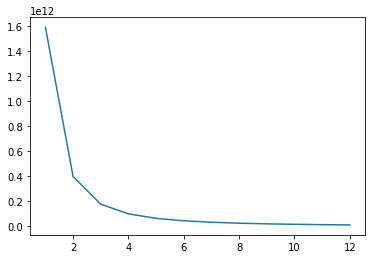

In [8]:
plt.plot(range(1,13), inercia)

In [9]:
features = []
for c in train_features_df.columns:
    t = str(train_features_df[c].dtype)
    if "int" in t or "float" in t:
        features.append(c)
features

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [10]:
numeric_cols = train_features_df.columns[train_features_df.dtypes != "object"]#.values
print(numeric_cols)

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')


In [11]:
df_feature = train_features_df[numeric_cols]
df_feature.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df_feature)
y_kmeans = kmeans.fit_predict(df_feature)
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

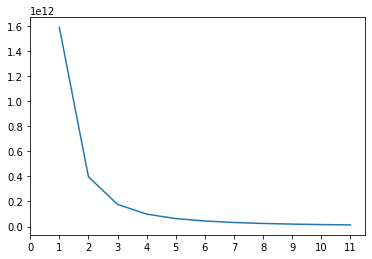

In [13]:
inercias = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(df_feature)
    inercias.append(kmeans.inertia_)
figure, ax = plt.subplots()
ax.plot(range(1,12), inercias)
xmin, xmax = ax.get_xlim()
custom_ticks = np.linspace(xmin, xmax, 12, dtype=int)
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_ticks)
print()

In [14]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 12), inercias, curve="convex", direction="decreasing")
kl.elbow

3

In [15]:
(train_labels_df["h1n1_vaccine"]
     .corr(train_labels_df["seasonal_vaccine"], method="pearson")
)

0.37714265306144495

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Proyectamos el dataset en 2 dimensiones usando t-SNE
# cdf = df_feature.drop(['diagnosis'], axis=1)
cdf = df_feature

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df_feature, df_tsne], axis=1)

# Hacemos clustering con KMeans y K=2
km = KMeans(n_clusters=2, max_iter=1000, random_state=1000)
Y_pred = km.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


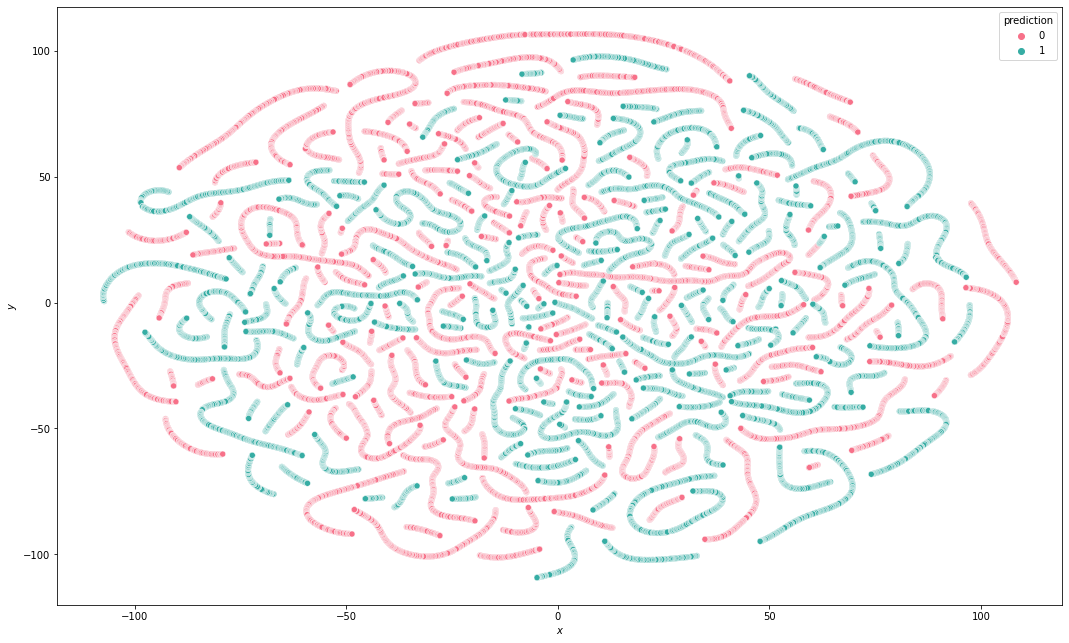

In [17]:
# Mostramos los resultados
fig, ax = plt.subplots(figsize=(18, 11))

sns.scatterplot(x='x',y='y',hue='prediction',sizes=(30, 400),
                palette=sns.color_palette("husl", 2),data=kmdff,ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

DBSCAN

In [18]:
import matplotlib.cm as cm
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [19]:
# Proyectamos el dataset en 2 dimensiones usando t-SNE
cdf = df_feature

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df_feature, df_tsne], axis=1)

# Hacemos clustering con DBSCAN
db = DBSCAN(eps=0.2,min_samples = 3)
Y_pred2 = db.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred2, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


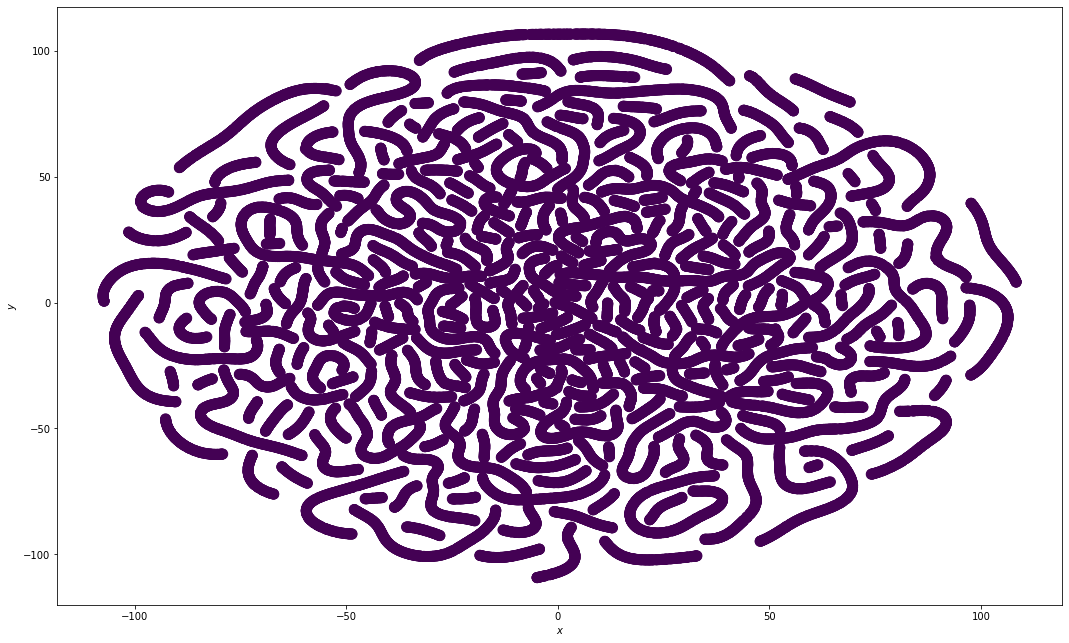

array([-1, -1, -1, ..., -1, -1, -1])

In [20]:
# Mostramos los resultados
fig, ax = plt.subplots(figsize=(18, 11))

# sns.scatterplot(x='x',y='y',hue='prediction',sizes=(30, 400),
#                palette=sns.color_palette("tab10", 1),data=kmdff,ax=ax)

plt.scatter(data_tsne[:,0],data_tsne[:,1], c=db.labels_, s=100)


ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()
db.labels_

Mean shift

In [21]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

In [22]:
df = df_feature
# Proyectamos el dataset en 2 dimensiones usando t-SNE
cdf = df

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df, df_tsne], axis=1)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [23]:
bandwidth = estimate_bandwidth(cdf, quantile=0.2, n_samples=50)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
Y_pred3 = ms.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred3, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

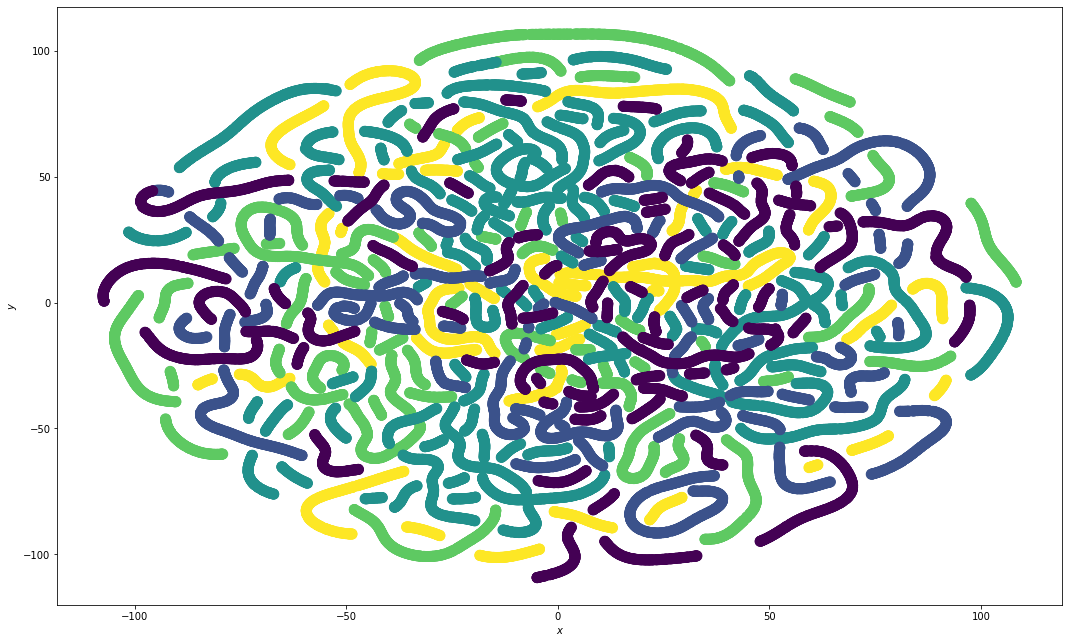

In [24]:
# Mostramos los resultados
fig, ax = plt.subplots(figsize=(18, 11))

#sns.scatterplot(x='x',y='y',hue='prediction',size='area_mean',style='diagnosis',sizes=(30, 400),
 #               palette=sns.color_palette("husl", 3),data=kmdff,ax=ax)

plt.scatter(data_tsne[:,0],data_tsne[:,1], c=ms.labels_, s=100)


ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

Clusrering Jerarquico

In [25]:
from sklearn.cluster import AgglomerativeClustering


In [26]:
tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df, df_tsne], axis=1)

# Hacemos clustering con AgglomerativeClustering y n_clusters=2
ag = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
Y_pred4 = ag.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred4, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


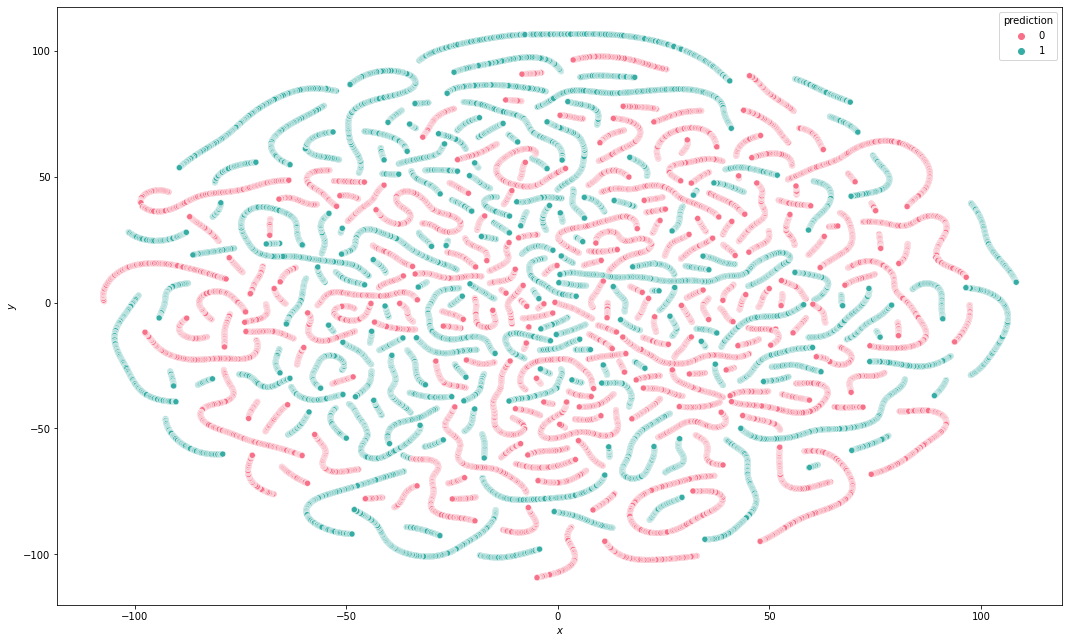

In [27]:
# Mostramos los resultados
fig, ax = plt.subplots(figsize=(18, 11))

sns.scatterplot(x='x',y='y',hue='prediction',sizes=(30, 400),
                palette=sns.color_palette("husl", 2),data=kmdff,ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plt.show()

Criterios Internos

In [47]:
from sklearn import metrics
from sklearn.cluster import estimate_bandwidth

In [29]:
print("Medidas internas para k-means con k=2:")
ss = metrics.silhouette_score(df_feature, y_kmeans, metric='euclidean')
ch = metrics.calinski_harabasz_score(df_feature, y_kmeans)
db = metrics.davies_bouldin_score(df_feature, y_kmeans)
print("Coef. de silueta: {}" .format(ss))
print("Coef. de Calinski-Harabasz: {}" .format(ch))
print("Coef. de Davies-Bouldin: {}" .format(db))

Medidas internas para k-means con k=2:
Coef. de silueta: 0.5901493200310276
Coef. de Calinski-Harabasz: 106814.22510982201
Coef. de Davies-Bouldin: 0.5000029569064371


In [30]:
print("Medidas internas para clustering jerárquico aglomerativo:")
ss2 = metrics.silhouette_score(df_feature, Y_pred4, metric='euclidean')
ch2 = metrics.calinski_harabasz_score(df_feature, Y_pred4)
db2 = metrics.davies_bouldin_score(df_feature,Y_pred4)

print("Coef. de silueta: {}" .format(ss2))
print("Coef. de Calinski-Harabasz: {}" .format(ch2))
print("Coef. de Davies-Bouldin: {}" .format(db2))

Medidas internas para clustering jerárquico aglomerativo:
Coef. de silueta: 0.6253472839835923
Coef. de Calinski-Harabasz: 79438.40163494961
Coef. de Davies-Bouldin: 0.5000014549928743


In [33]:
print("Medidas internas para mean shift:")
ss4 = metrics.silhouette_score(df_feature, Y_pred3, metric='euclidean')
ch4 = metrics.calinski_harabasz_score(df_feature, Y_pred3)
db4 = metrics.davies_bouldin_score(df_feature,Y_pred3)

print("Coef. de silueta: {}" .format(ss4))
print("Coef. de Calinski-Harabasz: {}" .format(ch4))
print("Coef. de Davies-Bouldin: {}" .format(db4))

Medidas internas para mean shift:
Coef. de silueta: 0.5311218500464137
Coef. de Calinski-Harabasz: 136300.5299629633
Coef. de Davies-Bouldin: 0.5000092128478975


In [46]:
# print("Medidas internas para DBSCAN:")
# ss3 = metrics.silhouette_score(df_feature, Y_pred2, metric='euclidean')
# ch3 = metrics.calinski_harabasz_score(df_feature, Y_pred2)
# db3 = metrics.davies_bouldin_score(df_feature,Y_pred2)

# print("Coef. de silueta: {}" .format(ss3))
# print("Coef. de Calinski-Harabasz: {}" .format(ch3))
# print("Coef. de Davies-Bouldin: {}" .format(db3))

In [49]:
print("Medidas externas para k-means con k=2:")
ars = metrics.adjusted_rand_score(train_labels_df['h1n1_vaccine'], y_kmeans)
fms = metrics.fowlkes_mallows_score(train_labels_df['h1n1_vaccine'], y_kmeans)
vm = metrics.v_measure_score(train_labels_df['h1n1_vaccine'], y_kmeans)
ami = metrics.adjusted_mutual_info_score(train_labels_df['h1n1_vaccine'], y_kmeans)


print("Índice de Rand ajustado: {}" .format(ars))
print("Índice de Falkes-Mallow: {}" .format(fms))
print("V-medida: {}" .format(vm))
print("AMI: {}" .format(ami))


Medidas externas para k-means con k=2:
Índice de Rand ajustado: -2.946630662928375e-05
Índice de Falkes-Mallow: 0.4709059336478911
V-medida: 4.7550781098489783e-07
AMI: -4.587892452047633e-05


In [52]:
print("Medidas externas para clustering jerárquico aglomerativo:")
ars2 = metrics.adjusted_rand_score(train_labels_df['h1n1_vaccine'], Y_pred4)
fms2 = metrics.fowlkes_mallows_score(train_labels_df['h1n1_vaccine'], Y_pred4)
vm2 = metrics.v_measure_score(train_labels_df['h1n1_vaccine'], Y_pred4)
ami2 = metrics.adjusted_mutual_info_score(train_labels_df['h1n1_vaccine'], Y_pred4)


print("Índice de Rand ajustado: {}" .format(ars2))
print("Índice de Falkes-Mallow: {}" .format(fms2))
print("V-medida: {}" .format(vm2))
print("AMI: {}" .format(ami2))

Medidas externas para clustering jerárquico aglomerativo:
Índice de Rand ajustado: 0.00026886819122546994
Índice de Falkes-Mallow: 0.5774992129865971
V-medida: 3.165919477911579e-05
AMI: 6.928139514507887e-07


In [53]:
print("Medidas externas para DBSCAN:")
ars3 = metrics.adjusted_rand_score(train_labels_df['h1n1_vaccine'], Y_pred2)
fms3 = metrics.fowlkes_mallows_score(train_labels_df['h1n1_vaccine'], Y_pred2)
vm3 = metrics.v_measure_score(train_labels_df['h1n1_vaccine'], Y_pred2)
ami3 = metrics.adjusted_mutual_info_score(train_labels_df['h1n1_vaccine'], Y_pred2)


print("Índice de Rand ajustado: {}" .format(ars3))
print("Índice de Falkes-Mallow: {}" .format(fms3))
print("V-medida: {}" .format(vm3))
print("AMI: {}" .format(ami3))

Medidas externas para DBSCAN:
Índice de Rand ajustado: 0.0
Índice de Falkes-Mallow: 0.8156918907191383
V-medida: 0.0
AMI: 0.0


In [54]:
print("Medidas externas para mean shift:")
ars4 = metrics.adjusted_rand_score(train_labels_df['h1n1_vaccine'], Y_pred3)
fms4 = metrics.fowlkes_mallows_score(train_labels_df['h1n1_vaccine'], Y_pred3)
vm4 = metrics.v_measure_score(train_labels_df['h1n1_vaccine'], Y_pred3)
ami4 = metrics.adjusted_mutual_info_score(train_labels_df['h1n1_vaccine'], Y_pred3)


print("Índice de Rand ajustado: {}" .format(ars4))
print("Índice de Falkes-Mallow: {}" .format(fms4))
print("V-medida: {}" .format(vm4))
print("AMI: {}" .format(ami4))

Medidas externas para mean shift:
Índice de Rand ajustado: -5.222704299935603e-05
Índice de Falkes-Mallow: 0.37421688340427695
V-medida: 6.046851956537232e-06
AMI: -6.525124887048272e-05


In [55]:
print('Fin')

Fin
